In [16]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data_complete = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_complete.head()


city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

In [17]:
city_data = pyber_data_complete.groupby(['city'], as_index=False)
city_data.count()

city_ave_fare = city_data["fare"].mean()
city_ave_fare

#URBAN

urban_data = pyber_data_complete.loc[pyber_data_complete["type"] == "Urban", :].groupby(['city'])

urban_ave_fare = urban_data["fare"].mean()
urban_ave_fare

urban_ride_count = urban_data["ride_id"].count()
urban_ride_count

urban_driver_count = urban_data["driver_count"].unique()
urban_driver_count 

#make them a df
urban_ave_fare = pd.DataFrame({"City":urban_ave_fare})
urban_ave_fare = urban_ave_fare.rename(columns={"City":"Urban Avg Fare"})

urban_ride_count = pd.DataFrame({"City":urban_ride_count})
urban_ride_count

urban_driver_count = pd.DataFrame({"City":urban_driver_count})

urban_rides = pd.merge(urban_ave_fare, urban_ride_count, on="city")

urban_rides = urban_rides.rename(columns={"City":"Urban Ride Count"})

urban_counts = pd.merge(urban_rides, urban_driver_count, on="city")

urban_counts = urban_counts.rename(columns={"City":"Urban Number Drivers"})
urban_counts["Urban Number Drivers"] = urban_counts["Urban Number Drivers"].astype(int)

#SUBURBAN
suburban_data = pyber_data_complete.loc[pyber_data_complete["type"] == "Suburban", :].groupby(['city'])

suburban_ave_fare = suburban_data["fare"].mean()
suburban_ave_fare

suburban_ride_count = suburban_data["ride_id"].count()
suburban_ride_count

suburban_driver_count = suburban_data["driver_count"].unique()
suburban_driver_count 

#make them a df
suburban_ave_fare = pd.DataFrame({"City":suburban_ave_fare})
suburban_ave_fare = suburban_ave_fare.rename(columns={"City":"Suburban Avg Fare"})

suburban_ride_count = pd.DataFrame({"City":suburban_ride_count})
suburban_ride_count

suburban_driver_count = pd.DataFrame({"City":suburban_driver_count})

suburban_rides = pd.merge(suburban_ave_fare, suburban_ride_count, on="city")

suburban_rides = suburban_rides.rename(columns={"City":"Suburban Ride Count"})

suburban_counts = pd.merge(suburban_rides, suburban_driver_count, on="city")

suburban_counts = suburban_counts.rename(columns={"City":"Suburban Number Drivers"})
suburban_counts["Suburban Number Drivers"] = suburban_counts["Suburban Number Drivers"].astype(int)

#RURAL

rural_data = pyber_data_complete.loc[pyber_data_complete["type"] == "Rural", :].groupby(['city'])

rural_ave_fare = rural_data["fare"].mean()
rural_ave_fare

rural_ride_count = rural_data["ride_id"].count()
rural_ride_count

rural_driver_count = rural_data["driver_count"].unique()
rural_driver_count 

#make them a df
rural_ave_fare = pd.DataFrame({"City":rural_ave_fare})
rural_ave_fare = rural_ave_fare.rename(columns={"City":"Rural Avg Fare"})

rural_ride_count = pd.DataFrame({"City":rural_ride_count})
rural_ride_count

rural_driver_count = pd.DataFrame({"City":rural_driver_count})

rural_rides = pd.merge(rural_ave_fare, rural_ride_count, on="city")

rural_rides = rural_rides.rename(columns={"City":"Rural Ride Count"})

rural_counts = pd.merge(rural_rides, rural_driver_count, on="city")

rural_counts = rural_counts.rename(columns={"City":"Rural Number Drivers"})
rural_counts["Rural Number Drivers"] = rural_counts["Rural Number Drivers"].astype(int)


## Bubble Plot of Ride Sharing Data

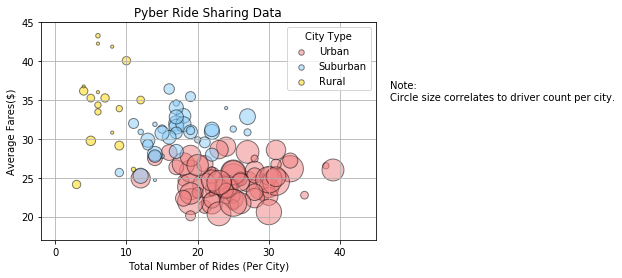

In [18]:
# Obtain the x and y coordinates for each of the three city types
# y is fare
# x is total rides per city

# x and y axis
y_axis_data = np.arange(20, 45, 5)
x_axis_data = np.arange(0, 45, 5)


# Build the scatter plots for each city types

#urban plot
# x is the number of rides
# y is the average fare per ride in urban


urban_fare = urban_counts["Urban Avg Fare"].tolist()
urban_rides = urban_counts["Urban Ride Count"].tolist()
urban_drivers = urban_counts["Urban Number Drivers"].tolist()

#suburban plot
suburban_fare = suburban_counts["Suburban Avg Fare"].tolist()
suburban_rides = suburban_counts["Suburban Ride Count"].tolist()
suburban_drivers = suburban_counts["Suburban Number Drivers"].tolist()

#rural color #FFD603
rural_fare = rural_counts["Rural Avg Fare"].tolist()
rural_rides = rural_counts["Rural Ride Count"].tolist()
rural_drivers = rural_counts["Rural Number Drivers"].tolist()

plt.scatter(urban_rides, urban_fare, s=[x * 10 for x in urban_drivers], label="Urban",color='#EF7F80', edgecolor="black", alpha=.5)
plt.scatter(suburban_rides, suburban_fare, s=[x * 10 for x in suburban_drivers], label="Suburban",color='#88CDFA', edgecolor="black", alpha=.5)
plt.scatter(rural_rides, rural_fare, s=[x * 10 for x in rural_drivers], label="Rural",color='#FFD603', edgecolor="black", alpha=.5)

plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares($)")


plt.xlim(-2, 45)
plt.ylim(17,45)
plt.grid()

# Create a legend
lgnd = plt.legend(loc="upper right", title="City Type", numpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


# Incorporate a text label regarding circle size
plt.text(47, 35, "Note:\nCircle size correlates to driver count per city.")
# Save Figure
plt.savefig("images/RideSharingData.png")
plt.show()



## Total Fares by City Type

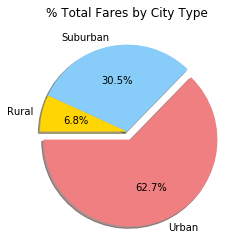

In [19]:
# Calculate Type Percents
urban_total_fare = urban_data["fare"].sum().sum()
suburban_total_fare = suburban_data["fare"].sum().sum()
rural_total_fare = rural_data["fare"].sum().sum()

urban_total_fare
#Build Pie Charts

labels = ["Urban", "Suburban", "Rural"]
fare = [urban_total_fare, suburban_total_fare, rural_total_fare]
colors = ['#EF7F80','#88CDFA', '#FFD603']

explode = [0.1, 0 ,0]

plt.title("% Total Fares by City Type")

plt.pie(fare, explode=explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=180)
#Save figure
plt.savefig("images/PieFares.png")
#Show plot
plt.show()

## Total Rides by City Type

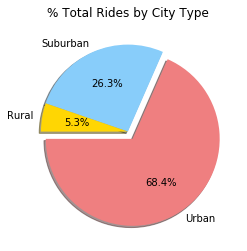

In [20]:
# Calculate Ride Percents

urban_total_rides = urban_counts["Urban Ride Count"].sum()
suburban_total_rides = suburban_counts["Suburban Ride Count"].sum()
rural_total_rides = rural_counts["Rural Ride Count"].sum()
# Build Pie Charts

labels = ["Urban", "Suburban", "Rural"]
drivers = [urban_total_rides, suburban_total_rides, rural_total_rides]
colors = ['#EF7F80','#88CDFA', '#FFD603']

explode = [0.1, 0 ,0]

plt.title("% Total Rides by City Type")

plt.pie(drivers, explode=explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=180)

#Save figure
plt.savefig("images/PieRides.png")
#Show plot
plt.show()


## Total Drivers by City Type

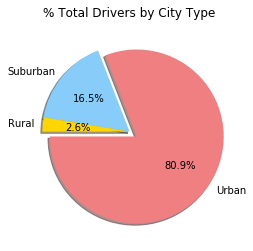

In [21]:
# Calculate Driver Percents

urban_total_drivers = urban_counts["Urban Number Drivers"].sum()
suburban_total_drivers = suburban_counts["Suburban Number Drivers"].sum()
rural_total_drivers = rural_counts["Rural Number Drivers"].sum()
# Build Pie Charts

title="Percent of Total Drivers by City Type"

labels = ["Urban", "Suburban", "Rural"]
drivers = [urban_total_drivers, suburban_total_drivers, rural_total_drivers]
colors = ['#EF7F80','#88CDFA', '#FFD603']

explode = [0.1, 0 ,0]

plt.title("% Total Drivers by City Type")

plt.pie(drivers, explode=explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=180)
# Save Figure
plt.savefig("images/PieDrivers.png")
# Show plot
plt.show()

